# les biblios

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, Normalizer, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Étape 1 : Chargement du dataset

In [6]:

# Étape 1 : Chargement du dataset
data = pd.read_csv("smoking.csv")
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [7]:
#verifier si notre dataset contients des donnes manquantes
data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

pas de zero dans le dataset 

In [8]:
#appercevoir les colonnes de notre dataset
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [9]:
#creation des groupes pour chaque tranche d'age
def create_age_groups(age):
    if 18 <= age <= 44:
        return 'jeune'
    elif 45 <= age <= 64:
        return 'adulte moyen'
    else:
        return 'vieux'

#utilisation
data["age group"]= data['age'].apply(create_age_groups)

In [10]:
# fonction de regroupement des goupes ages et leur smoking status
def group_data(data, column, smoker):
    grouped_data = data[data['smoking'] == smoker].groupby('age group')[column].mean()
    return grouped_data
#aplication
grouped_h_smokers = group_data(data,"hemoglobin",1)
grouped_h_non_smokers = group_data(data,"hemoglobin",0)

# Le Plot:
representation des pourcentages du smoking/non smoking par tranche d'age en fonction de l'indice
Hemoglobin

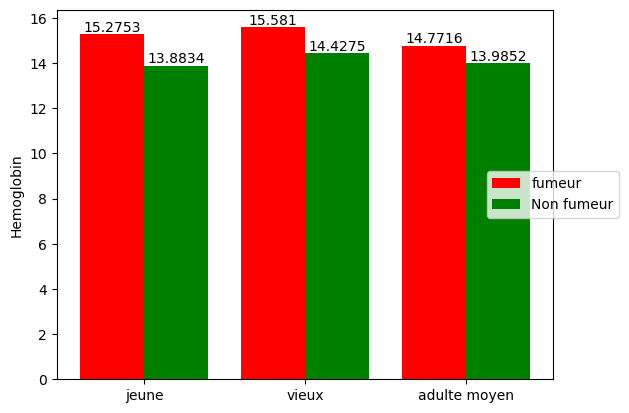

In [11]:
#le x label = age groupe:
age_groups = list(set(data['age group']))

# indices de l'axe X:
x_indices = np.arange(len(age_groups))

# Creation de la figure :
fig, axix = plt.subplots()

# creation des bars:
axix.bar(x_indices - 0.2, grouped_h_smokers, width=0.4, color='red', align='center')
axix.bar(x_indices + 0.2, grouped_h_non_smokers, width=0.4, color='green', align='center')
for container in axix.containers:
    axix.bar_label(container)

# Labels:
axix.set_xticks(x_indices)
axix.set_xticklabels(age_groups, rotation=0)
axix.set_ylabel('Hemoglobin')

# la legend:
axix.legend(['fumeur', 'Non fumeur'],loc='center',bbox_to_anchor=(1.0, 0.5))

# affichage:
plt.savefig('hemoglobin-smoker-plot.png')
plt.show()


a la fin on supprime la colonne : age group

In [12]:
data.drop("age group", axis= 1,inplace=True)

In [13]:
#on definie une fonction qui sepparent les valeurs categorielles, numeriques et mixtes
def cat_or_num(data_, cat_t=10):
    cat_cols = [col for col in data_.columns if data_[col].dtypes == "O"]
    num_but_cat = [col for col in data_.columns if data_[col].nunique() < cat_t and
                   data_[col].dtypes != "O"]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in data_.columns if data_[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Les Observations: {data_.shape[0]}")
    print(f"Les Variables: {data_.shape[1]}")
    print(f'les colonnes categorilles: {len(cat_cols)}')
    print(f'les colonnes numeriques: {len(num_cols)}')
    print(f'les colonnes mixtes: {len(num_but_cat)}')

    return cat_cols, num_cols, num_but_cat

In [14]:
cat_cols, num_cols, num_but_cat = cat_or_num(data)

Les Observations: 55692
Les Variables: 27
les colonnes categorilles: 8
les colonnes numeriques: 19
les colonnes mixtes: 5


Comme vous pouvez le voir, nous avons 8 variables catégorielles,19 numeriques,5 mixtes Notre objectif est de prédire la colonne Smoking en construisant des modèles d'apprentissage automatique, mais avant, nous devons encore explorer les données.

In [15]:
# fonction qui affiche les colonnes categorielles

def cat_function(data_, col_name, plot=False):
    print(pd.DataFrame({col_name: data_[col_name].value_counts(),
                        "Ratio": 100 * data_[col_name].value_counts() / len(data_)}))
    print("--------------------------------------------------------")

    if plot:
        sns.countplot(x=data_[col_name], data=data_)
        plt.show()
for col in cat_cols:
    cat_function(data, col)

        gender      Ratio
gender                   
M        35401  63.565683
F        20291  36.434317
--------------------------------------------------------
       oral  Ratio
oral              
Y     55692  100.0
--------------------------------------------------------
        tartar      Ratio
tartar                   
Y        30940  55.555556
N        24752  44.444444
--------------------------------------------------------
               hearing(left)      Ratio
hearing(left)                          
1.0                    54267  97.441284
2.0                     1425   2.558716
--------------------------------------------------------
                hearing(right)      Ratio
hearing(right)                           
1.0                      54236  97.385621
2.0                       1456   2.614379
--------------------------------------------------------
               Urine protein      Ratio
Urine protein                          
1.0                    52599  94.446240
2.

# Scalling

In [16]:
#fonction de normalisation des donnees numeriques
def normalize_numerical(data_, num_cols, method='standard'):
    if method == 'min_max':
        scaler = MinMaxScaler()
    elif method == 'standard':
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid normalization method: Choose 'min_max' or 'standard'.")

    data_[num_cols] = scaler.fit_transform(data_[num_cols])
    return data_

# Applying normalization avec standarisation
data_normalized = normalize_numerical(data, num_cols)
final_data=data_normalized


# PREDICTION:
1-Logistic Regression

2-Random Foret

3-Gradient Boosting

# Regression logistique

In [17]:
#definition du x et y
X = final_data.drop("smoking", axis=1)
y = final_data["smoking"]

avant on doit encoder les valeurs categorielles en numeriques

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
#encodage des valeurs categorilles en numerique
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [19]:
#on seppare les donnes en test et train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [20]:
# entrainnement du model logistique
logictic_model = LogisticRegression()
logictic_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# la prediciction de y pour les X tests
y_prediction = logictic_model.predict(X_test)


In [22]:
#definition de la matrice de confusion en fonction
def plot_confusion_matrix(y_true, y_pred):
    #accuracy
    acc = round(accuracy_score(y_true, y_pred), 2)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.xlabel("Y actual")
    plt.ylabel("Y predicted")
    plt.title(f"Matrice de confusion (Accuracy: {acc})")
    plt.show()

Ici, nous pouvons voir quelles valeurs étaient en fait 1 et 0, et combien de prédictions correctes et erronées notre modèle a faites. Cette image l'explique clairement:

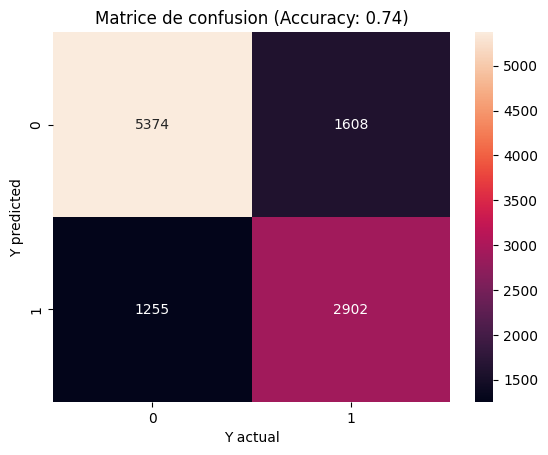

In [21]:
#matrice de conf:y_test et y_prediction
plot_confusion_matrix(y_test,y_prediction)

In [22]:
#accuracy 
accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.74


In [23]:
#les 10 premier lignes de prediction
y_prediction[:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [24]:
#les scores pour test
#score de precision
precision_reg_test = precision_score(y_test, y_prediction)
print(f"Score de precision  : {precision_reg_test}")
#score de recall
recall_reg_test = recall_score(y_test, y_prediction)
#le score F1
Score_f1_reg_test = f1_score(y_test, y_prediction)
print(f"Score F1 : {Score_f1_reg_test}")
print(f"Rappel : {recall_reg_test}")

Score de precision  : 0.6434589800443459
Score F1 : 0.669666551286489
Rappel : 0.6980995910512389


Accuracy: 0.75


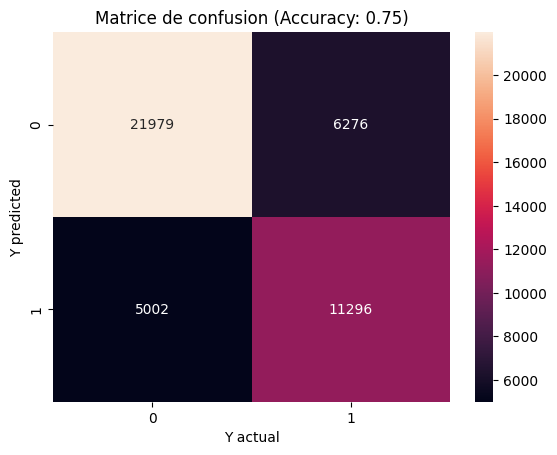

In [25]:
#matrice de confusion
y_pred = logictic_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')
plot_confusion_matrix(y_train, y_pred)


Maintenant evaluation du train

In [27]:
#les scores pour train
#score de precision
precision_train = precision_score(y_train, y_pred)
print(f"Score de precision : {precision_train}")
#score de recall
recall_train = recall_score(y_train, y_pred)
#le score F1
Score_f1_train = f1_score(y_train, y_pred)
print(f"Score F1 : {Score_f1_train}")
print(f"Rappel : {recall_train}")


Score de precision : 0.6428408832233098
Score F1 : 0.6670209625036906
Rappel : 0.6930911768315131



L' Accuracy est de 0,75 et nous pouvons dire que notre modèle n'est pas surajusté.

# RANDOM FOREST 

In [28]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [29]:
#entrainement du model
randomForest = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [30]:
#Pour voir les performances du modèle sur de nouvelles données invisibles
y_predicted_rf = randomForest.predict(X_test)

In [31]:
#accuracy
accuracy = accuracy_score(y_test, y_predicted_rf)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


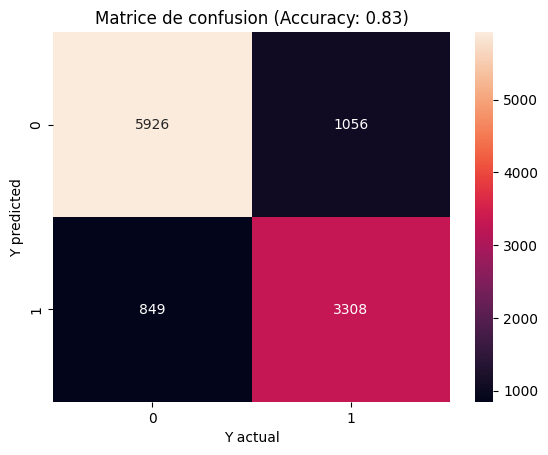

In [32]:
#matrice de confusion
plot_confusion_matrix(y_test, y_predicted_rf)

In [33]:
#report sur les scores (precision,recall,f1 score)
precision_rf_test = precision_score(y_test, y_predicted_rf)
print(f"Score de precision du gradient : {precision_rf_test}")
#score de recall
recall_test_rf = recall_score(y_test, y_predicted_rf)
#le score F1
Score_f1_rf_test = f1_score(y_test, y_predicted_rf)
print(f"Score F1 du Randomforest  : {Score_f1_rf_test}")
print(f"Rappel du Randomforest  : {recall_test_rf}")

Score de precision du gradient : 0.7580201649862511
Score F1 du Randomforest  : 0.7764346907639949
Rappel du Randomforest  : 0.795766177531874


In [34]:
#Évaluation de la précision des données du train
y_pred_train_rf = randomForest.predict(X_train)

In [35]:
accuracy = accuracy_score(y_train, y_pred_train_rf)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


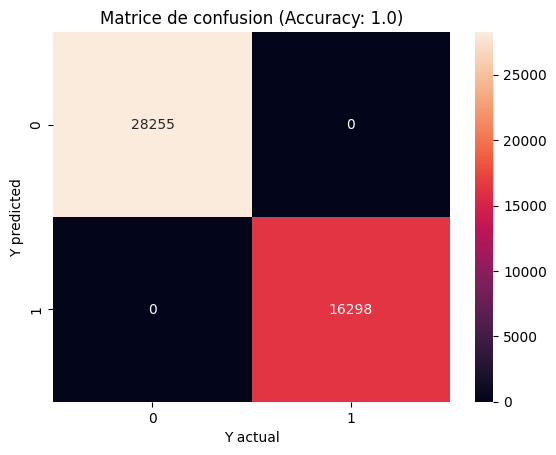

In [36]:
plot_confusion_matrix(y_train, y_pred_train_rf)

# Algorithme du Gradient

In [37]:
#entrainement du model
gradient_model = GradientBoostingClassifier(random_state=22).fit(X_train, y_train)

In [38]:
y_pred_grad_test = gradient_model.predict(X_test)


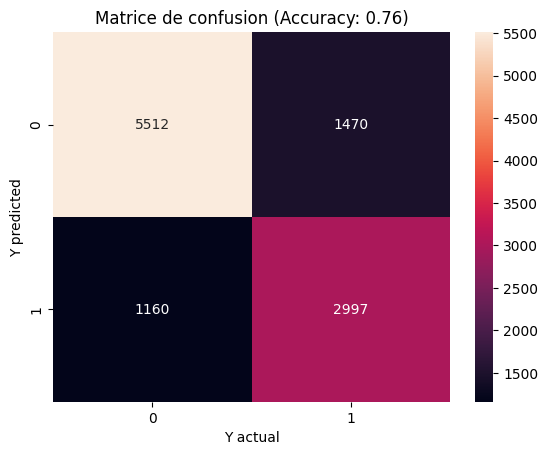

In [39]:
plot_confusion_matrix(y_test, y_pred_grad_test)

In [40]:
#presition test
precision_test_grad = precision_score(y_test, y_pred_grad_test)
print(f"Score de precision du gradient : {precision_test_grad}")
#score de recall
recall_test_grad = recall_score(y_test, y_pred_grad_test)
#le score F1
Score_f1_test_grad = f1_score(y_test, y_pred_grad_test)
print(f"Score F1 du gradient  : {Score_f1_test_grad}")
print(f"Rappel du gradient  : {recall_test_grad}")

Score de precision du gradient : 0.6709200805910007
Score F1 du gradient  : 0.6950371057513914
Rappel du gradient  : 0.7209526100553284


In [41]:
#Évaluation de la précision des données d'entraînement

In [42]:
y_pred_grad_train = gradient_model.predict(X_train)

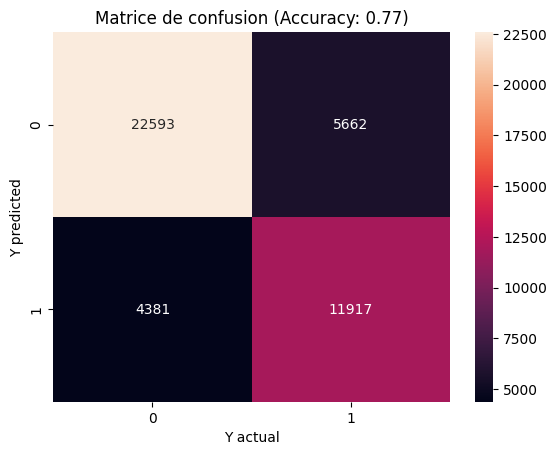

In [43]:
plot_confusion_matrix(y_train, y_pred_grad_train)

In [44]:
#les scores pour train
#score de precision
precision_train_grad = precision_score(y_train, y_pred_grad_train)
print(f"Score de precision du gradient : {precision_train_grad}")
#score de recall
recall_train_grad = recall_score(y_train, y_pred_grad_train)
#le score F1
Score_f1_train_grad = f1_score(y_train, y_pred_grad_train)
print(f"Score F1 du gradient  : {Score_f1_train_grad}")
print(f"Rappel du gradient  : {recall_train_grad}")


Score de precision du gradient : 0.6779111439786109
Score F1 du gradient  : 0.7035451781444638
Rappel du gradient  : 0.7311940115351577


Le score de accuracy sur les données d'entraînement est de 0,77, nous pouvons donc dire que le modèle n'est pas surajusté.

# Gradient avec optimisation des parametres

In [45]:
#Afin d'optimiser les performances du modèle d'amplification de gradient, un processus de réglage du modèle a été effectué.
gbm_params = {"learning_rate": [0.2, 0.1, 0.01],
             "max_depth":[3,5,8,10],
             "n_estimators":[10, 100]}

In [46]:
#chargement du model gradient
gbm_model = GradientBoostingClassifier(random_state=42)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint
#
random_search = RandomizedSearchCV(gbm_model, gbm_params, n_iter=15, cv=5, scoring='accuracy', random_state=42)

In [48]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=15,
                   param_distributions={'learning_rate': [0.2, 0.1, 0.01],
                                        'max_depth': [3, 5, 8, 10],
                                        'n_estimators': [10, 100]},
                   random_state=42, scoring='accuracy')

In [54]:
print("Meilleurs paramètres:", random_search.best_params_)

Meilleurs paramètres: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}


In [55]:
best_model = random_search.best_estimator_

In [56]:
test_accuracy = best_model.score(X_test, y_test)

In [57]:
print("Précision sur l'ensemble de test:", test_accuracy)

Précision sur l'ensemble de test: 0.8087799622946404


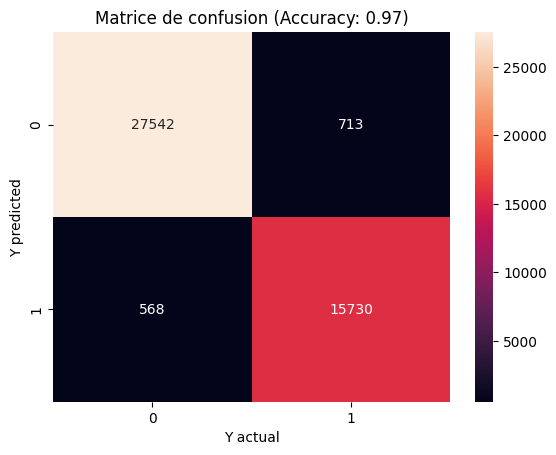

In [58]:
y_pred_optim_train = best_model.predict(X_train)
plot_confusion_matrix(y_train, y_pred_optim_train)

In [ ]:
#comme vous pouver voir l'accuracy a augmente avec n=15 d'iterations, en augmentant les iteartions ce score va augmenter 